# Outline

- **[1- Problem Statement](#1)**
    - [1.1 Data Content](#1.1)
    - [1.2 Load Packages and Reading Data](#1.2)
    
### Exploratory Data Analysis

- **[2- Univariate Visualizations](#2)**
    - [2.1- Columns Insights](#3)
- **[3- Bivariate Visualizations](#4)**
- **[4- Conclusion](#5)**
    
### Machine Learning

- **[5- ML Packages](#packages)**
- **[6- Data Preparation for ML](#pre)**
- **[7- Apply Machine Learning Algorithms](#alg)**
- **[8- Best Model 💡](#best)**



<br>

---

<br>



<br>

---

<br>


<a name ="1"></a>
# 1- Problem Statement

### Context
- Identify customer satisfaction is a key element for modern businesses as it can significantly contribute to a continuing effort of service quality improvement. In order to meet customer expectations and achieve higher quality levels, airlines needs to develop a specific mechanism of passenger satisfaction measurement.

- This is a <font color = 'green' size=4>classification</font> supervised machine learning project, Predicting Satisfaction of Airline Passengers.

- This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

<br>

<a name ="1"></a>
# 1- Problem Statement

### Context
- Identify customer satisfaction is a key element for modern businesses as it can significantly contribute to a continuing effort of service quality improvement. In order to meet customer expectations and achieve higher quality levels, airlines needs to develop a specific mechanism of passenger satisfaction measurement.

- This is a <font color = 'green' size=4>classification</font> supervised machine learning project, Predicting Satisfaction of Airline Passengers.

- This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

<br>

<a name ="1.1"></a>

### 1.1 Data Content
- This dataset is obtained from Kaggle: [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction)



<br>
<br>

<details>
    <summary><font size="3"><b>Attributes (Click to expand)</b></font></summary>


<br>

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival
    
Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

<br>

---

<a name = "1.2"></a>

### 1.2 Load Packages and Reading Data

In [1]:
import pandas as pd,numpy as np,seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import iqr
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


matplotlib and seaborn for visualizing the data, Pandas and Numpy for manipulation process.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airline-passenger-satisfaction/data_dictionary.csv
/kaggle/input/airline-passenger-satisfaction/airline_passenger_satisfaction.csv


In [3]:
data = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/airline_passenger_satisfaction.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### Missing Values

There is one column with missing values we identify it from his type (float) which indicates to either float answers or **nan** Values.

In [5]:
data.drop(columns=['ID'],inplace=True)

Id column is useless in both process (EDA - ML).

<a name ='2'></a>

# 2- Univariate Visualizations

#### Styling Matplotlib and Seaborn

In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
plt.style.use("seaborn-colorblind")

In [8]:
sns.color_palette('Blues',3)

[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897),
 (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 (0.1271049596309112, 0.4401845444059977, 0.7074971164936563)]

---

- Getting categorical data columns to be easy to automate processes for them later.

In [9]:
categorical_data = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_data

['Type of Travel', 'Customer Type', 'Class', 'Gender', 'Satisfaction']

In [10]:
for i in categorical_data:
    print(i)
    print(data[i].unique())
    print('--'*20)

Type of Travel
['Business' 'Personal']
----------------------------------------
Customer Type
['First-time' 'Returning']
----------------------------------------
Class
['Business' 'Economy' 'Economy Plus']
----------------------------------------
Gender
['Male' 'Female']
----------------------------------------
Satisfaction
['Neutral or Dissatisfied' 'Satisfied']
----------------------------------------


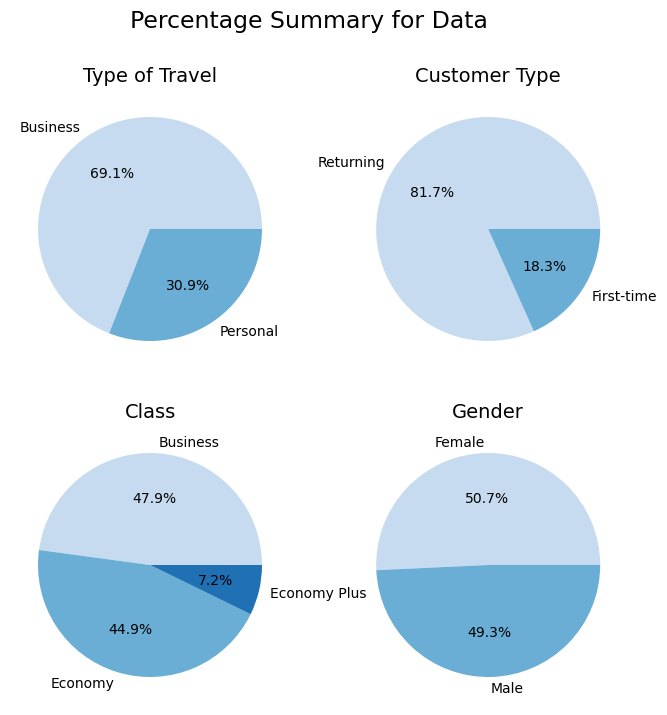

In [11]:
sns.set_palette('Blues',3)
c = categorical_data.copy()
c.remove('Satisfaction')

fig, ax = plt.subplots(2, 2, figsize=(8, 8)) 

for ind, i in enumerate(c):
    d = data[i].value_counts()
    ax[ind // 2, ind % 2].pie(d, autopct='%1.1f%%', labels=d.index)
    ax[ind // 2, ind % 2].set_title(i, size=14)  



fig.suptitle("Percentage Summary for Data", size=17)
plt.show()


- Most customers are <font color='#2088a8' size=4>Returning Passengers</font>, so they have experienced the services before.
- <font color='#2088a8' size=4>Most Passengers</font> were in <font color='#2088a8' size=4>Business Class</font> and the percentage of passengers in <font color ='darkgreen' size=4>Economy Plus</font> is relatively <font color ='darkgreen' size=4>small</font>.
- Gender seemed to be <font color='#2088a8' size=4>Equal</font> in data.
- The Most common Type of Travel is <font color ='#2088a8' size=4>Business</font>

---

Let's examine the numerical columns, namely Age, Flight Distance, Departure Delay, and Arrival Delay.

In [12]:
data.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


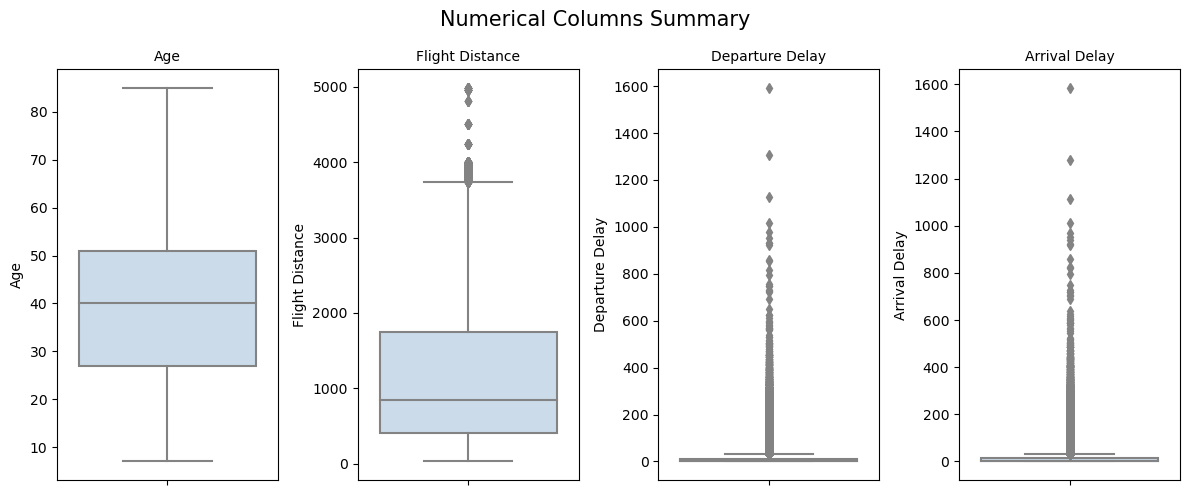

In [13]:
numerical_columns=data.describe().columns[:4]

fig,axes = plt.subplots(1,len(numerical_columns),figsize=(12,5))
for ind,col in enumerate(numerical_columns):
    sns.boxplot(data=data,ax=axes[ind],y=col)
    axes[ind].set_title(col,size=10)
    
fig.suptitle("Numerical Columns Summary",size=15)
fig.tight_layout()
plt.show()

There are a lot of <font color='#4287f5'>outliers</font> in the columns Flight Distance, Departure Delay, and Arrival Delay.
Outliers were detected using the interquartile range:

$$
\text{max_thresh} = Q3 + IQR*1.5\\
\text{min_thresh} = Q1 - IQR*1.5
$$
- I may specify Q3 as I want to be representing 95% of data instead of 75%

---

We should deal with missing values in the Arrival Delay column before revisiting the outliers problem.

In [14]:
data.loc[:,numerical_columns].head()

,Age,Flight Distance,Departure Delay,Arrival Delay
0,48,821,2,5.0
1,35,821,26,39.0
2,41,853,0,0.0
3,50,1905,0,0.0
4,49,3470,0,1.0


In [15]:
data.isna().sum()[data.isna().sum()!=0]/data.shape[0]*100

Arrival Delay    0.302587
dtype: float64

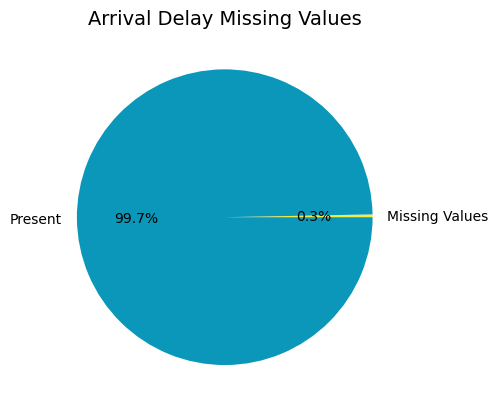

In [16]:
isnull = data['Arrival Delay'].isnull().sum()/data.shape[0]*100

plt.pie([isnull,100-isnull],labels=['Missing Values','Present'],autopct='%1.1f%%',colors =['#f5ec42','#0b97ba'])
plt.title("Arrival Delay Missing Values",size=14)
plt.show()

Since the number of missing values is relatively small compared to the data, I have decided to drop them.

In [17]:
data.dropna(axis=0,subset=['Arrival Delay'],inplace=True)
data['Arrival Delay'] = data['Arrival Delay'].astype('int64')

---

Returning to Outlires

In [18]:
print("Outlires Percentages in Numerical columns: \n")

liss = []
for col in numerical_columns:
    maxi = (1.5*iqr(data[col]))+np.quantile(data[col],.95 if col !='Flight Distance' else .85)
    outlires = data[data[col]>maxi]
    print(col.capitalize()+' '+str(outlires.shape[0]/data.shape[0]*100)[:10]+' %')


Outlires Percentages in Numerical columns: 

Age 0.0 %
Flight distance 0.04247530 %
Departure delay 3.56251978 %
Arrival delay 3.58414358 %


In [19]:
maxdict = {}
for col in numerical_columns:
    maxdict[col]=(1.5*iqr(data[col]))+np.quantile(data[col],.95 if col !='Flight Distance' else .85)
maxdict

{'Age': 100.0,
 'Flight Distance': 4414.0,
 'Departure Delay': 95.0,
 'Arrival Delay': 97.5}

In [20]:
outlires = data[(data['Flight Distance']>maxdict['Flight Distance'] )| (data['Departure Delay']>maxdict['Departure Delay']) | (data['Arrival Delay']>maxdict['Arrival Delay'])]
print(str(outlires.shape[0]/data.shape[0]*100)[:4]+'%')

4.03%


>Only <font color='#4287f5'>4%</font> of the data I decided to let them, under the assumption that they are special cases.

In [21]:
data.drop(outlires.index,axis=0,inplace=True)

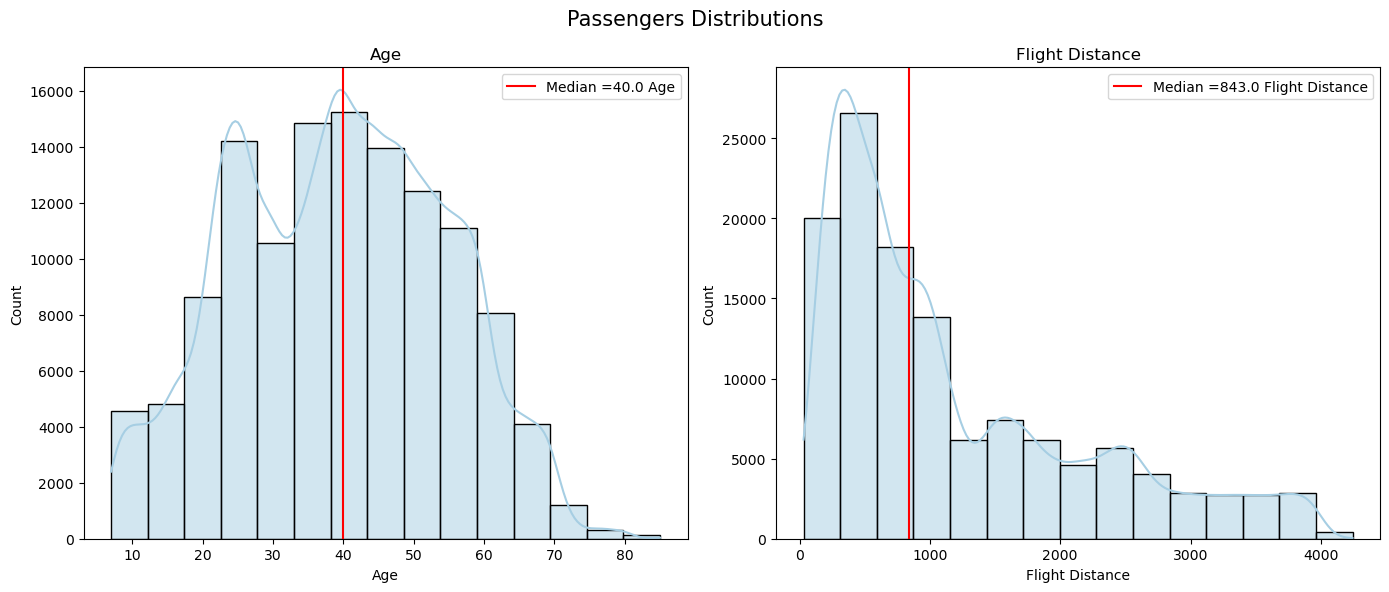

In [22]:
sns.set_palette('Paired')
fig,axs = plt.subplots(1,len(numerical_columns)-2,figsize=(14,6))

for ind,col in enumerate(numerical_columns[:2]):
    sns.histplot(data=data,x=col,ax=axs[ind],kde=True,bins=15)
    axs[ind].set_title(col)
    axs[ind].set_xlabel(col)
    axs[ind].axvline(data[col].median(),label=f'Median ={data[col].median()} {col}',color='r')
    axs[ind].legend()
    
fig.suptitle("Passengers Distributions",size=15)
fig.tight_layout()
plt.show()

- we can see from Age Distribution that:
    - Ages has <font color ='#2088a8' size=4>Normal ditribution</font>
    - Average Age in Passengers is <font color ='#2088a8' size=4>40 </font>years old
    - <font color ='#2088a8' size=4>Age 25</font> is present alot too.
- Flight Distance Distribution:
    - The Distribution here has <font color ='#2088a8' size=4>Right Skewness</font>
    - Majority of Flights are under 1000 km

---

Moving to Time Delays in data, I created a column with total delay for each passanger to be easy to deal with time delay later.
look at [High correlation](#corr) which allow us to do so.


In [23]:
data['Total Time Delay'] = data['Arrival Delay']+data['Departure Delay']

I will convert delays columns into categories to be easy to interpret later.

In [24]:
for col in ['Arrival Delay','Departure Delay','Total Time Delay']:
    data[str(col+'_Category')] = pd.cut(data[col],bins=[0,1,10,20,60,data[col].max()],
           labels=['<1','1-10','10-20','20-60','>60'],
          include_lowest=True)

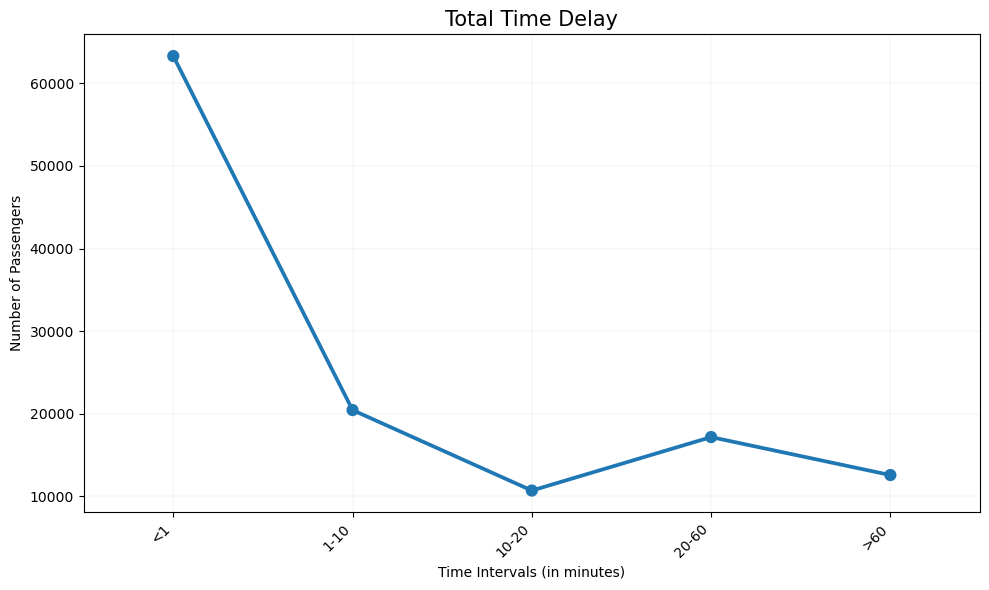

In [25]:
toplot = data['Total Time Delay_Category'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

sns.pointplot(x=toplot.index, y=toplot, color='#1f77b4', ax=ax)

ax.set_xlabel('Time Intervals (in minutes)')
ax.set_ylabel('Number of Passengers')
ax.set_title('Total Time Delay', size=15)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.grid(True, which='both', linestyle='--', linewidth=0.1, color='gray')

plt.tight_layout()
plt.show()

- From this graph, we can observe the following trends:
    - Majority of Passenger with <font color ='#2088a8' size=4>no delay</font> at all
    - Approximately <font color ='#2088a8' size=4>16%</font> of passengers face delays between 20 minutes to 60 minutes, and half of them face delays of more than one hour.

---

Let's move into the Rating columns, from Departure and Arrival Time Convenience to Baggage Handling, and analyze them.

In [26]:
Rating_Columns = data.loc[:,'Departure and Arrival Time Convenience':'Baggage Handling'].columns.tolist()
print(Rating_Columns)

['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


<br>
I have assigned the Rating columns to a variable for easier handling later.

In [27]:
numerical_Ratings = data.loc[:,'Departure and Arrival Time Convenience':'Baggage Handling'].copy()
numerical_Ratings = numerical_Ratings.apply(lambda col : col.replace(0,col.mode()[0]))

numerical_Ratings.describe()

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000
mean,3.265138,2.890126,3.309689,3.353444,2.975414,3.389900,3.447883,3.365113,3.288331,3.212957,3.654595,2.791928,3.363850,3.631804
std,1.361477,1.271898,1.263524,1.252885,1.279056,1.285336,1.318117,1.300323,1.312525,1.327320,1.172470,1.248250,1.334446,1.182671
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


I have copied the Rating Services data to deal with numbers and will convert the original data into categorical as they should be.

In [28]:
for col in Rating_Columns:
    data[col] = pd.Categorical(data[col])
    data[col] = data[col].replace(0,data[col].mode()[0])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124260 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  124260 non-null  object  
 1   Age                                     124260 non-null  int64   
 2   Customer Type                           124260 non-null  object  
 3   Type of Travel                          124260 non-null  object  
 4   Class                                   124260 non-null  object  
 5   Flight Distance                         124260 non-null  int64   
 6   Departure Delay                         124260 non-null  int64   
 7   Arrival Delay                           124260 non-null  int64   
 8   Departure and Arrival Time Convenience  124260 non-null  category
 9   Ease of Online Booking                  124260 non-null  category
 10  Check-in Service                

---

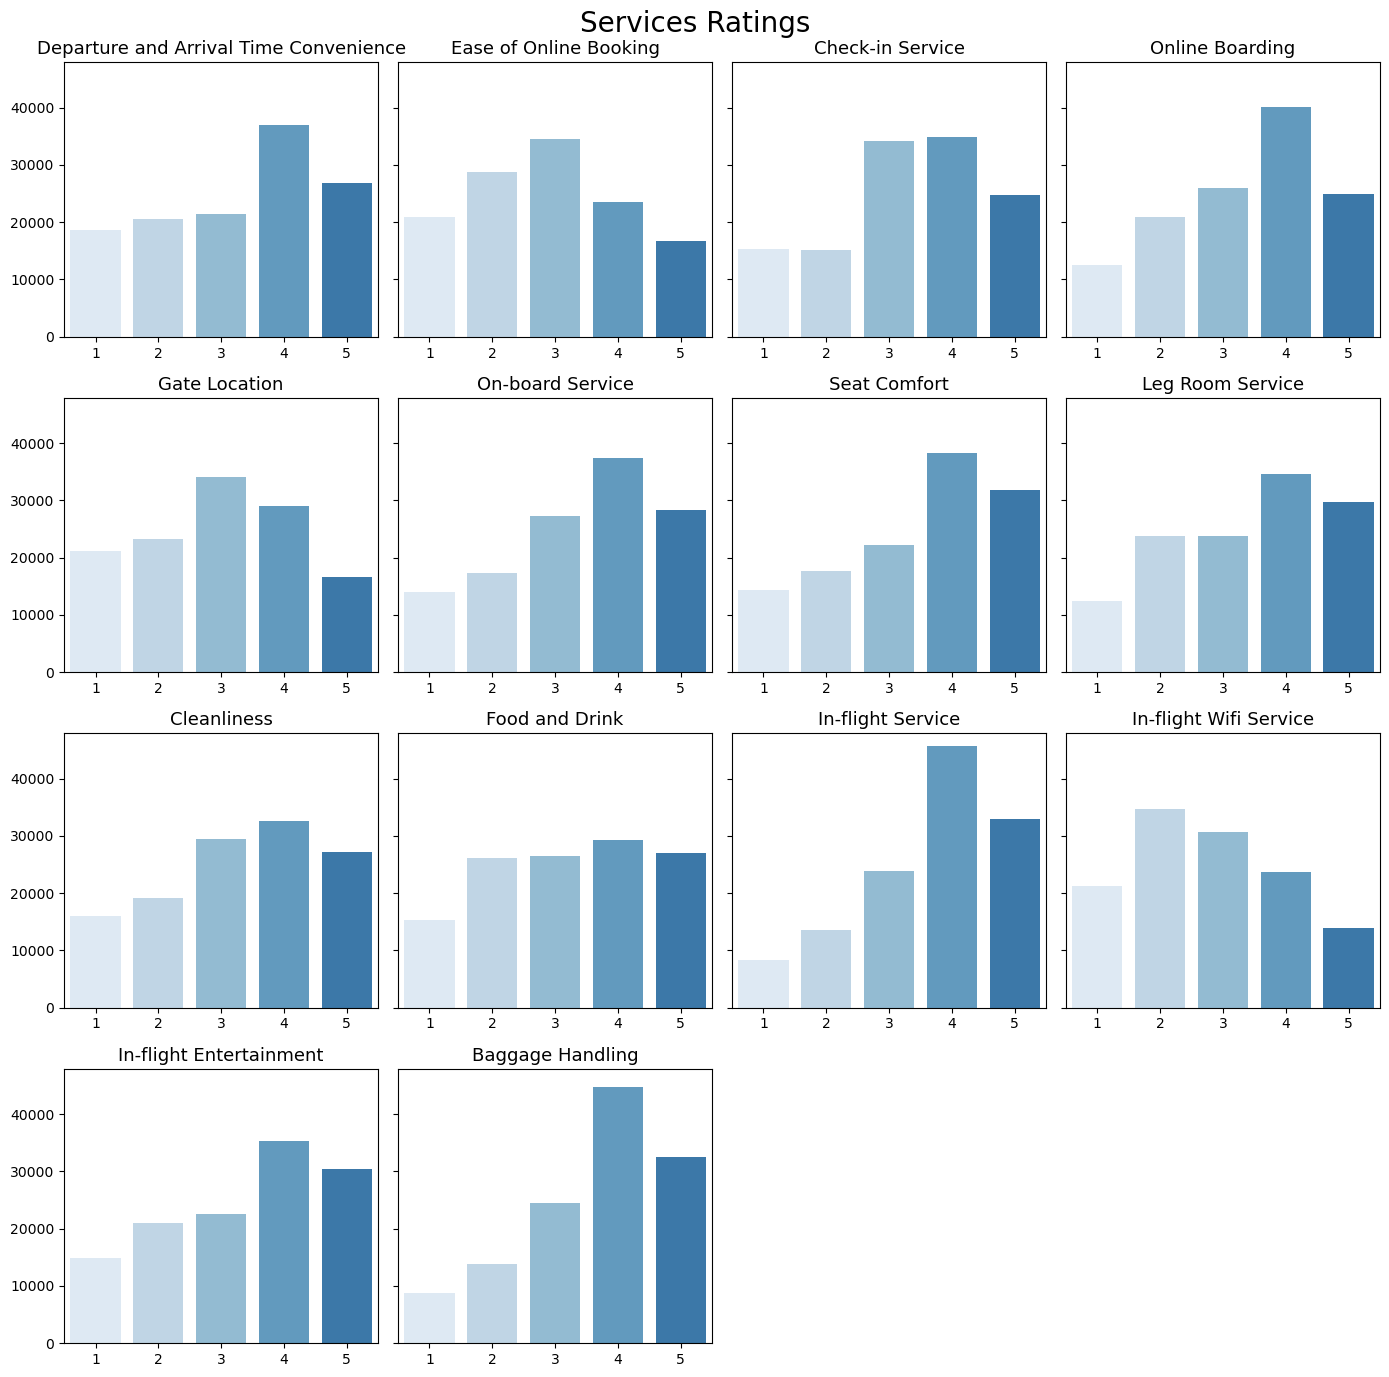

In [30]:
sns.set_palette('Blues')
fig,axes = plt.subplots(4,4,figsize=(14,14),sharey=True)
k = 0
for i in range(4):
    for j in range(4):
        sns.countplot(data=data,x=Rating_Columns[k],ax=axes[i][j])
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_title(Rating_Columns[k],size=13)

        k+=1
        if k>13:break
      
    
axes[3][2].axis('off')
axes[3][3].axis('off')

fig.suptitle("Services Ratings",size=20)
fig.tight_layout()
plt.show()

- We Can notice that services got good ratings are:
    - <font color= '#2293b5' size=4>In flight service, baggage handling, Online Boarding, On Board service</font>
- services got poor rating:
    - <font color='red' size=4>Wifi Service, Gate Location, ease of online booking</font>

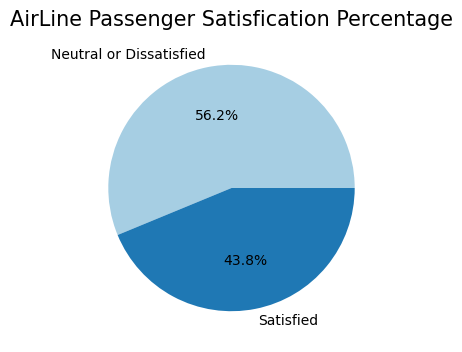

In [31]:
sns.set_palette('Paired')
fig,ax = plt.subplots(1,1,figsize=(4,4))
d = data['Satisfaction'].value_counts()
ax.pie(d,autopct = '%1.1f%%',labels=d.index)
ax.set_title('AirLine Passenger Satisfication Percentage',size=15)
plt.show()

- Majority of poeple <font color='#2088a8' size=3>Neutral or Dissatisfied</font>



---


<br>
<br>

<a name ='3'></a>

## 2.1- Columns Insights

- Most customers are <font color='#2088a8' size=4>Returning Passengers</font>, so they have experienced the services before.
- <font color='#2088a8' size=4>Most Passengers</font> were in <font color='#2088a8' size=4>Business Class</font> and the percentage of passengers in <font color ='darkgreen' size=4>Economy Plus</font> is relatively <font color ='darkgreen' size=4>small</font>.
- Gender seemed to be <font color='#2088a8' size=4>Equal</font> in data.
- The Most common Type of Travel is <font color ='#2088a8' size=4>Business</font>

There are a lot of <font color='#2088a8' size=4>outliers</font> in the columns <font color='#2088a8' size=4>Flight Distance, Departure Delay, and Arrival Delay.</font>

- <font size=4>Age</font> Distribution:
    - Ages has <font color ='#2088a8' size=4>Normal ditribution</font>.
    - <font color ='#2088a8' size=4>Average</font> Age in Passengers is <font color ='#2088a8' size=4>40 </font>years old.
    - <font color ='#2088a8' size=4>Age 25 </font> has many Flights.
    
    
- <font size=4>Flight Distance</font> Distribution:
    - The Distribution has <font color ='#2088a8' size=4>Right Skewness</font>
    - <font color ='#2088a8' size=4>Majority</font> of Flights are <font color ='#2088a8' size=4>under 1000 km</font>.


- <font color ='#2088a8' size =4>Majority</font>  of Passenger with <font color ='#2088a8' size =4>no delay</font> at all
- Approximately <font color ='#2088a8' size=4>16%</font> of passengers face delays between <font color ='#2088a8' size =4> 20 minutes to 60 minutes</font>, and half of them face delays of more than one hour.


- Services got good ratings are:
    - <font color= '#2293b5' size=4>In flight service, baggage handling, Online Boarding, On Board service</font>
- services got poor rating:
    - <font color='red' size=4>Wifi Service, Gate Location, ease of online booking</font>


- Majority of Passengers <font color='#2088a8' size=4>Neutral or Dissatisfied</font>

---

<a name='4'></a>

# 3- Bivariate Visualizations

<br>
<font size=4 style='bold'> Age</font> with Categories

In [32]:
data['Type of Travel'].value_counts()

Business    85787
Personal    38473
Name: Type of Travel, dtype: int64

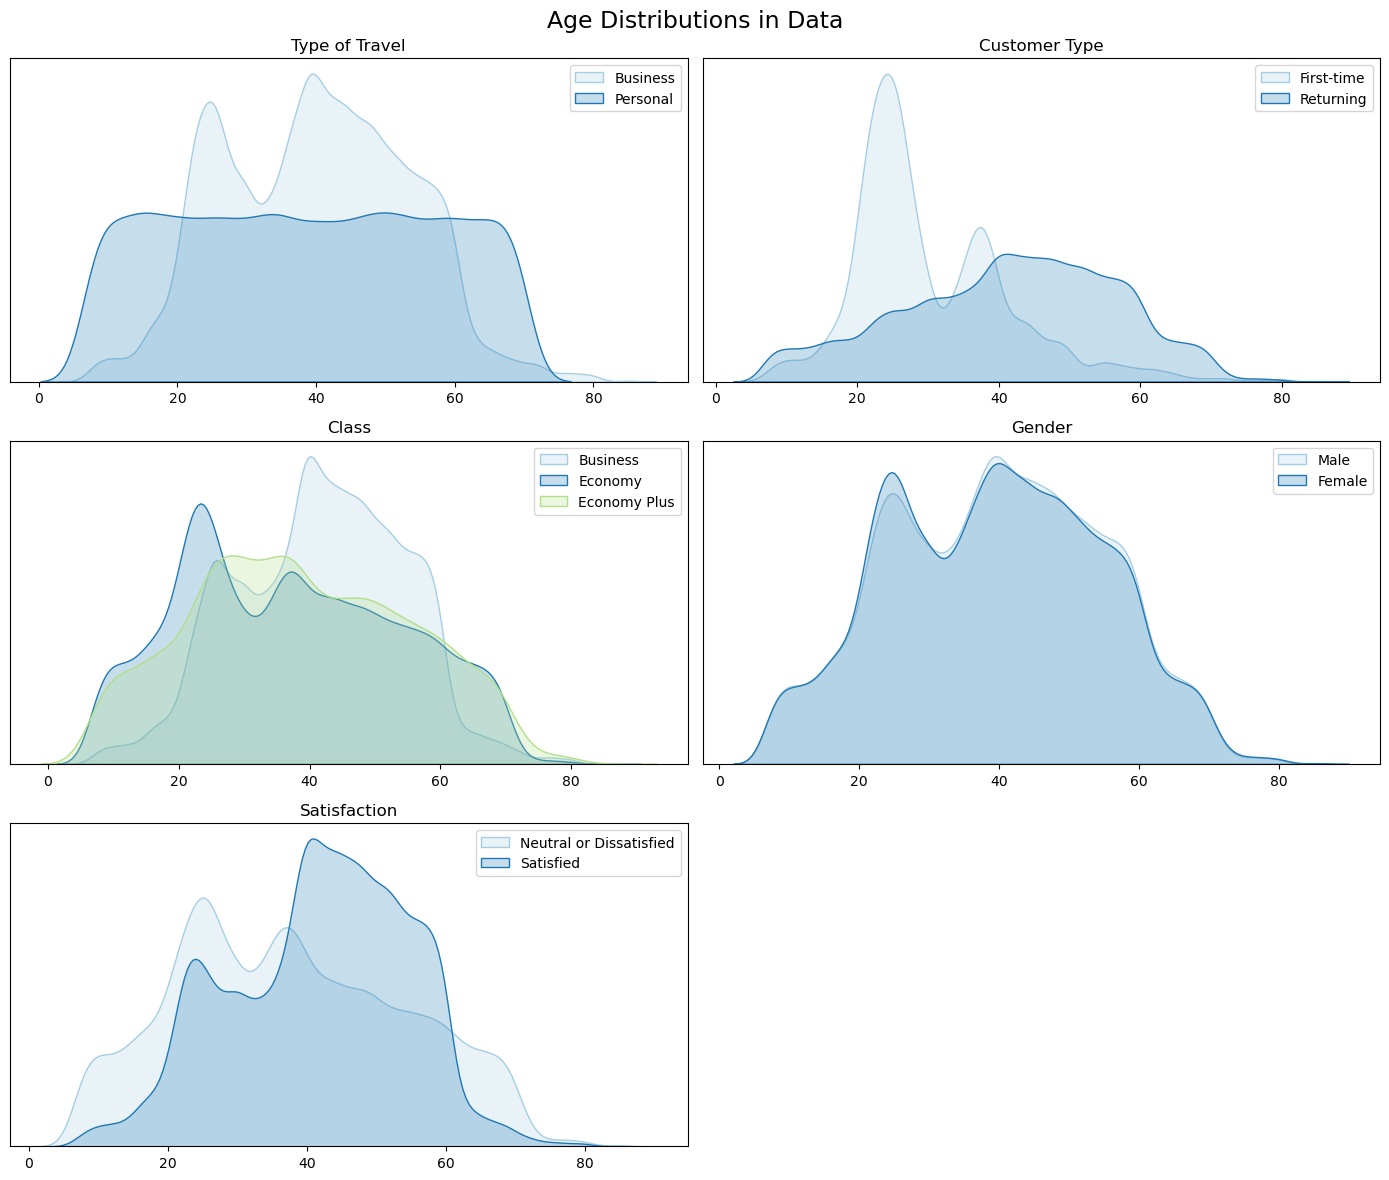

In [33]:
def automated_dist(num_col,additionalcolumns=0):
    fig = plt.figure(figsize=(14,12))
    
    cat_colmns = categorical_data.copy()
    if additionalcolumns:cat_colmns.append(additionalcolumns)

    for i,col in enumerate(cat_colmns):
        plt.subplot(3,2,i+1)
        toplot = data[col].unique().tolist()
        for ind,j in enumerate(toplot):
            g = sns.kdeplot(data = data[data[col]==j],x=num_col,label=j,fill=True)
        g.set_xlabel('')
        g.set_ylabel('')
        plt.yticks([])
        g.set_title(col)
        g.legend()

    fig.suptitle(f"{num_col} Distributions in Data",size=17)
    fig.tight_layout()
    plt.show()
    

automated_dist('Age')

Age Distributions for Passangers differ based on their type of travel, Satifacation, customer type and class:
- <font color='#2088a8' size=3 >Older Passengers</font> tend to be:
    - <font color='#2088a8' size=4 >Satisfied, Returning Customers, Business Class</font>.


- <font color='#a83232' size=3 >Younger Passengers</font> tend to be:
    - <font color='#a83232' size=4 >Dissatisfied, First time Customers, Economy Class</font>.
- <font color='#309663' size=4>Equally</font> Age Distributed for Passengers <font color='#309663' size=4>Gender</font>.

---

let's see<font size=4 > Flight Distance </font> ditributed and compare categories to each others.

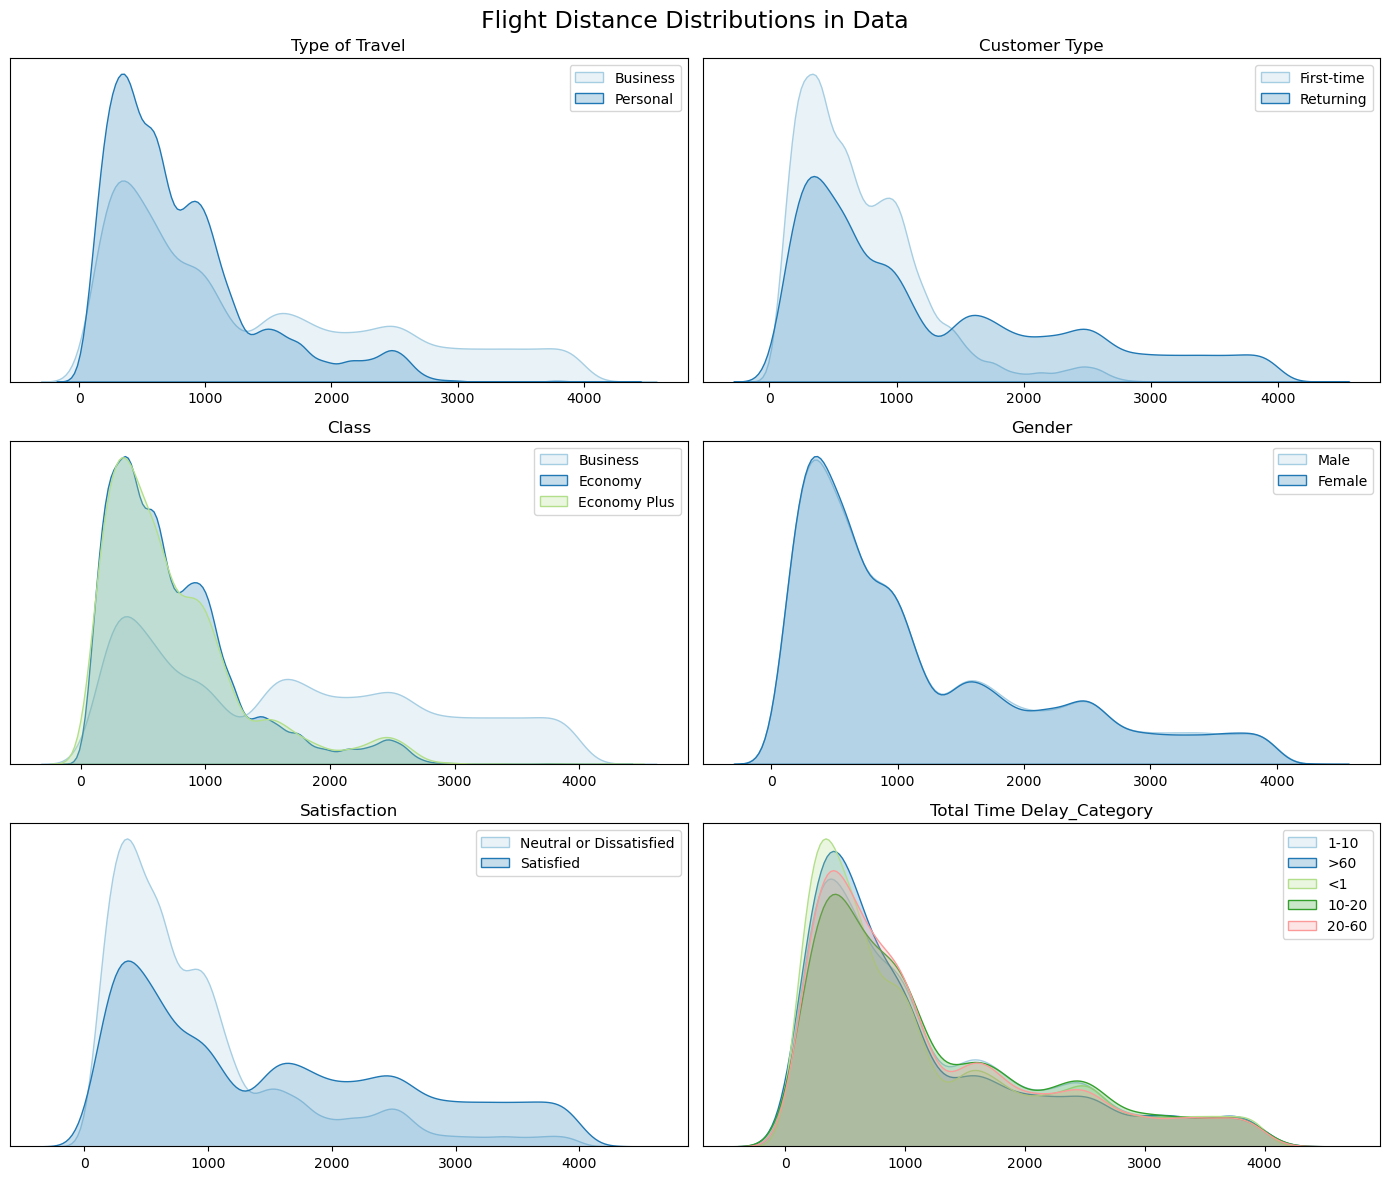

In [34]:
automated_dist('Flight Distance','Total Time Delay_Category')

Flight distance Distributions for passangers differ based on their type of travel, Satifacation, customer type and class:
-  <font color='#2088a8' size=4 >Business</font> type of travel ,<font color='#2088a8' size=4 >Satisfied</font> Passengers
,<font color='#2088a8' size=4 >Business</font> Class, <font color='#2088a8' size=4 >Returning</font> Customers. All of those Traveled long Distance than others.


- <font color='#a83232' size=4 >Gender</font> and <font color='#a83232' size=4 >Total Time Delay</font> Categories has same distribution for Kilometeres Traveled

---

<a name='corr'></a>

let's look at <font  size=4 >Delays </font> relationship.

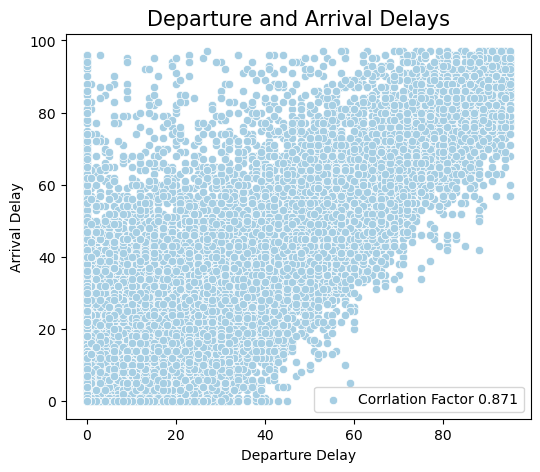

In [35]:
fig,ax = plt.subplots(figsize=(6,5))

sns.scatterplot(data=data,x='Departure Delay',y='Arrival Delay',ax=ax,
            label=f"Corrlation Factor {str(data['Departure Delay'].corr(data['Arrival Delay']))[:5]}")

ax.set_title("Departure and Arrival Delays",size=15)
plt.legend()
plt.show()

- <font color='#2088a8' size=4 >Strong</font> Relationship between Departure and Arrival Delay Times

---

Let's see is <font size=4>Satisfaction</font> affected by specific categories or not.

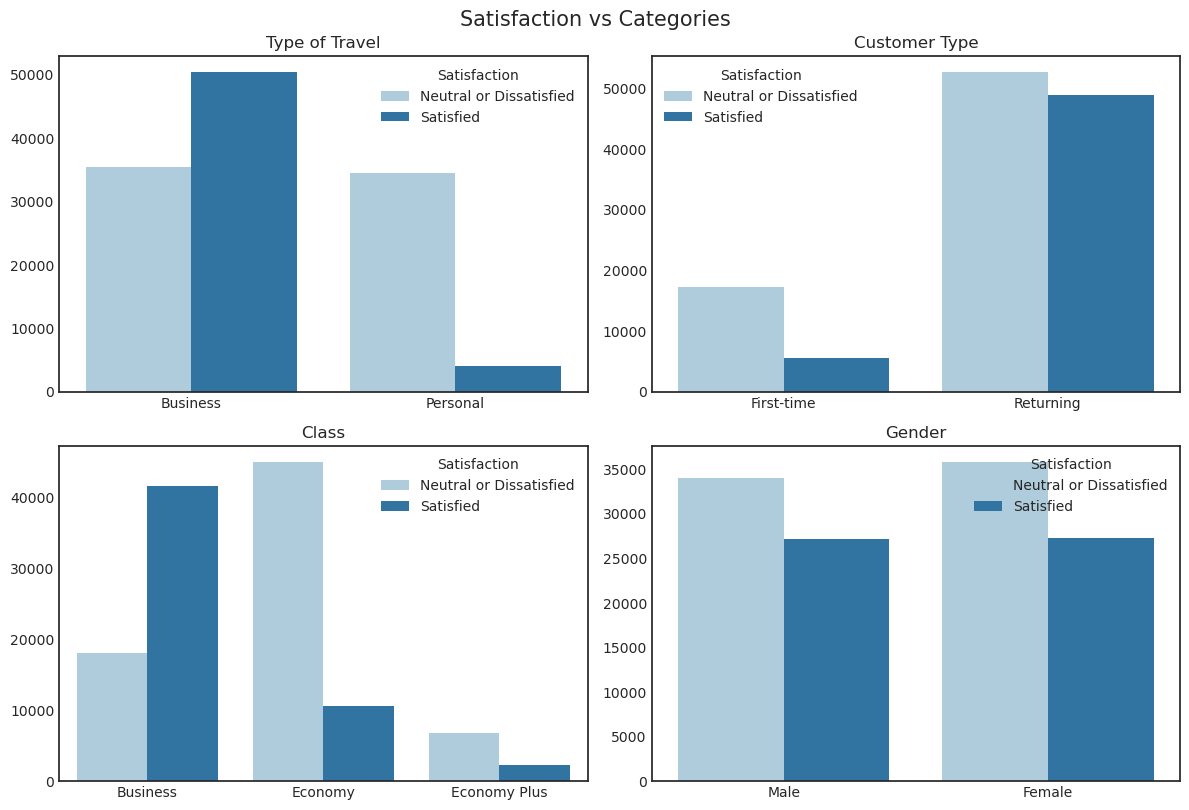

In [36]:
plt.style.use('seaborn-white')
sns.set_palette('Paired')


fig = plt.figure(figsize=(12,12))

cols = categorical_data.copy()
cols.remove('Satisfaction')

for ind,col in enumerate(cols):
    
    plt.subplot(3,2,ind+1)
    g = sns.countplot(data=data,x=col,hue='Satisfaction')
    g.set_xlabel('')
    g.set_ylabel('')
    g.set_title(col)
    
fig.suptitle("Satisfaction vs Categories",size=15)
fig.tight_layout()
plt.show()

- <font color='#309663' size=4 >Returning</font> Customer type is almost<font color='#309663' size=4 > Equally</font> (satisfied & dissatisfied) but <font color='#a83232' size=4 > First time</font> Customers <font color='#a83232' size=4 >not satified at all</font>.


- <font color='#2088a8' size=4 >Business</font> Class is <font color='#2088a8' size=4 >More Satisfied</font> unlike <font color='#a83232' size=4 >Economy & Eco Plus</font> Class which mostly <font color='#a83232' size=4 >not satisfied</font>.


- <font color='#2088a8' size=4 >Business</font> Type of Travel is <font color='#2088a8' size=4 >More Satisfied</font> unlike <font color='#a83232' size=4 >Personal</font> type which mostly <font color='#a83232' size=4 >not satisfied</font>.


- <font color='#309663' size=4 >Gender</font> is almost <font color='#309663' size=4 >Equally</font> for Satisfied (or not) Men and Women.


---

### Services Ratings

In [37]:
def services_for_each(optional_col = ''):
    
    """
    This is function for creating new data which calculate mean rate for each category for each service.
    I/P : optional column category to compare it's categories AVG rating.
    O/P : data frame combined from Services, Groups, value columns. Each record representing 
    AVG rate for this service in Service Column, for that category in Groups Column, at value Column. 
    """
    
    new = pd.DataFrame()
    new['Service'] = Rating_Columns
    
    if optional_col!='':
        
        for cat in data[optional_col].value_counts().index.tolist():
            lis = []
            for service in new['Service']:
                lis.append(numerical_Ratings[data[optional_col]==cat][service].mean())
            new[cat] = lis
    else:
        lis = []
        for col in Rating_Columns:
            lis.append(numerical_Ratings[col].mean())
        new['Rating'] = lis
    df_melted = new.melt(id_vars=['Service'], value_vars=new.columns[1:].tolist(), var_name='Groups')
    return df_melted


def service_show(col):
    fig,ax = plt.subplots(1,1,figsize=(15,5))

    created_data= services_for_each(col)
    a = sns.pointplot(data=created_data,y='value',x='Service',hue='Groups',ax=ax)
    a.set_ylabel('')
    a.set_xlabel('')
    a.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.15, color='black')

    fig.suptitle(f"Services Rating with {col}",size=18)
    fig.tight_layout()
    plt.xticks(rotation=25)
    plt.show()

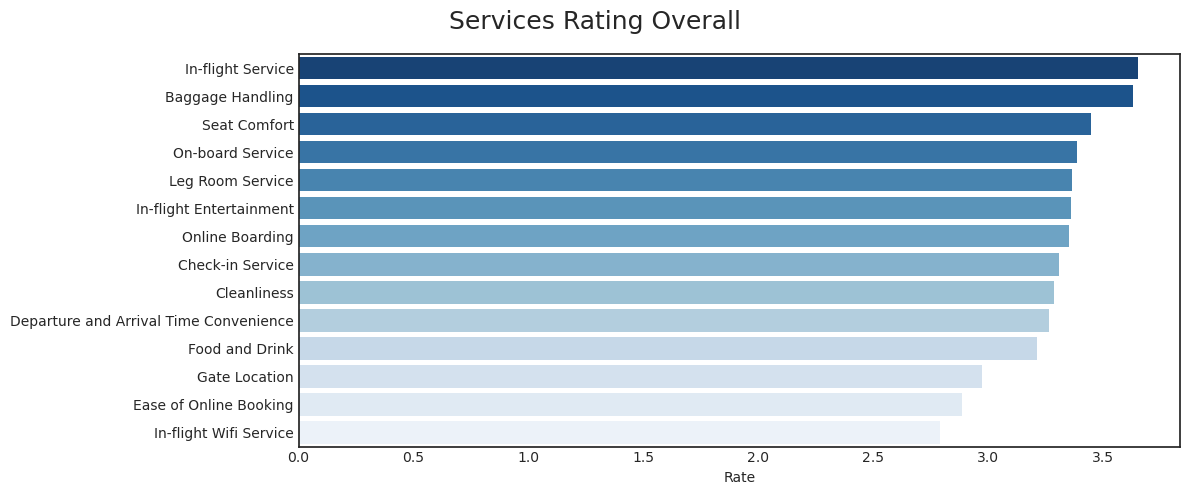

In [38]:
fig,ax = plt.subplots(1,1,figsize=(12,5))

created_data= services_for_each().sort_values(by='value',ascending=False)
a = sns.barplot(data=created_data,x='value',y='Service',ax=ax,palette='Blues_r')

a.set_ylabel('')
a.set_xlabel('Rate')

fig.suptitle(f"Services Rating Overall",size=18)
fig.tight_layout()
plt.show()

- <font color='#2088a8' size=4 > In-Flight Service, Baggage Handling and Seat Comfort </font> are best 3 Services by Passengers Rating.


- <font color='#a83232' size=4 >Wifi , Ease of Online Booking, Gate Location</font> services got pooring rates by Passengers.

---

Now we can compare AVG Rating for each Category in Categories Columns:

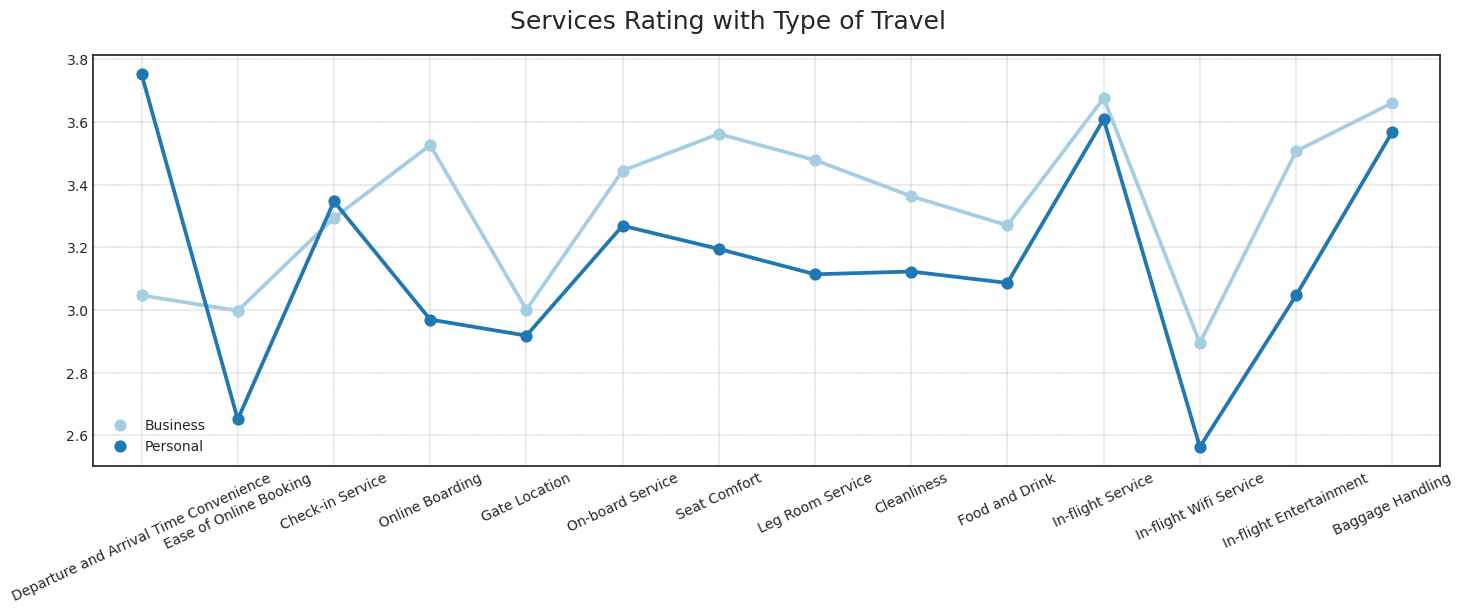

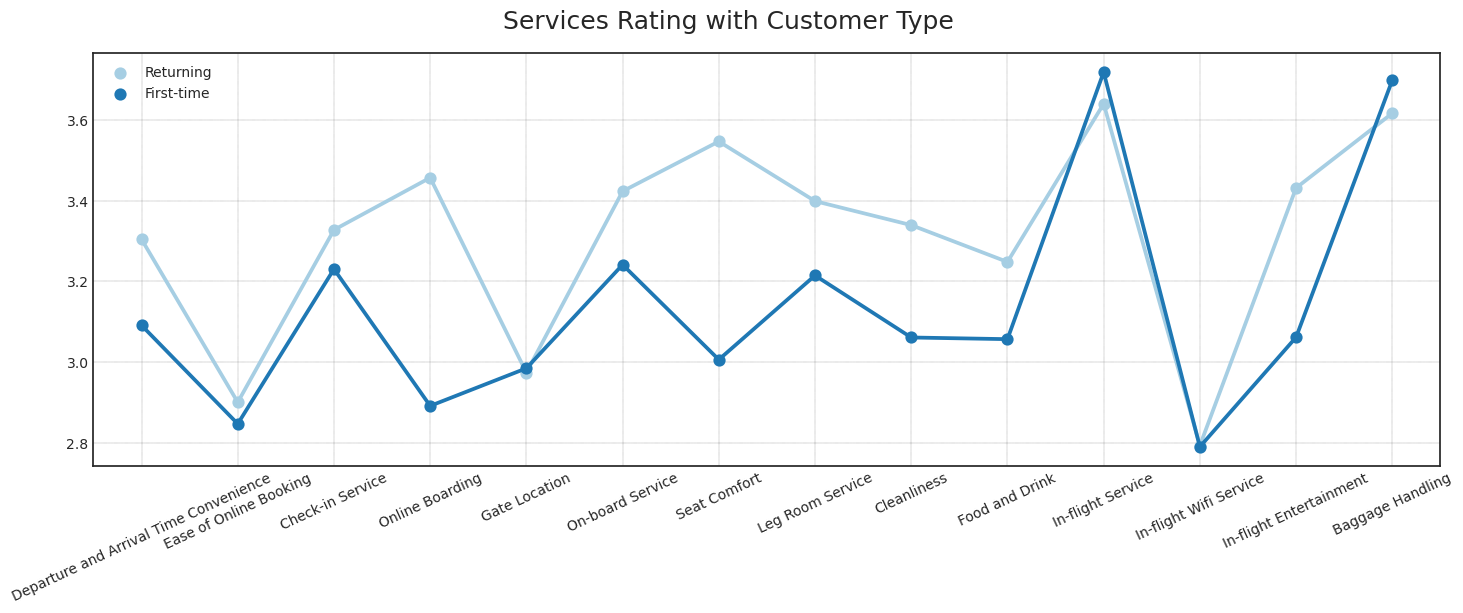

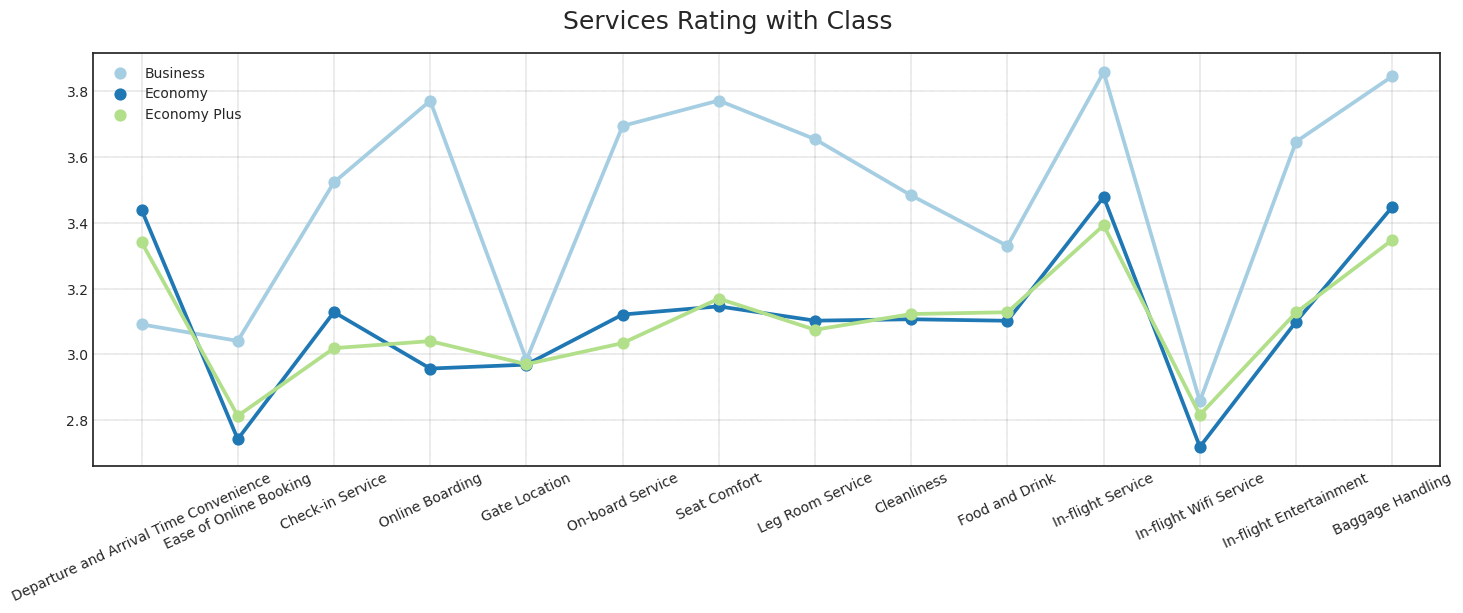

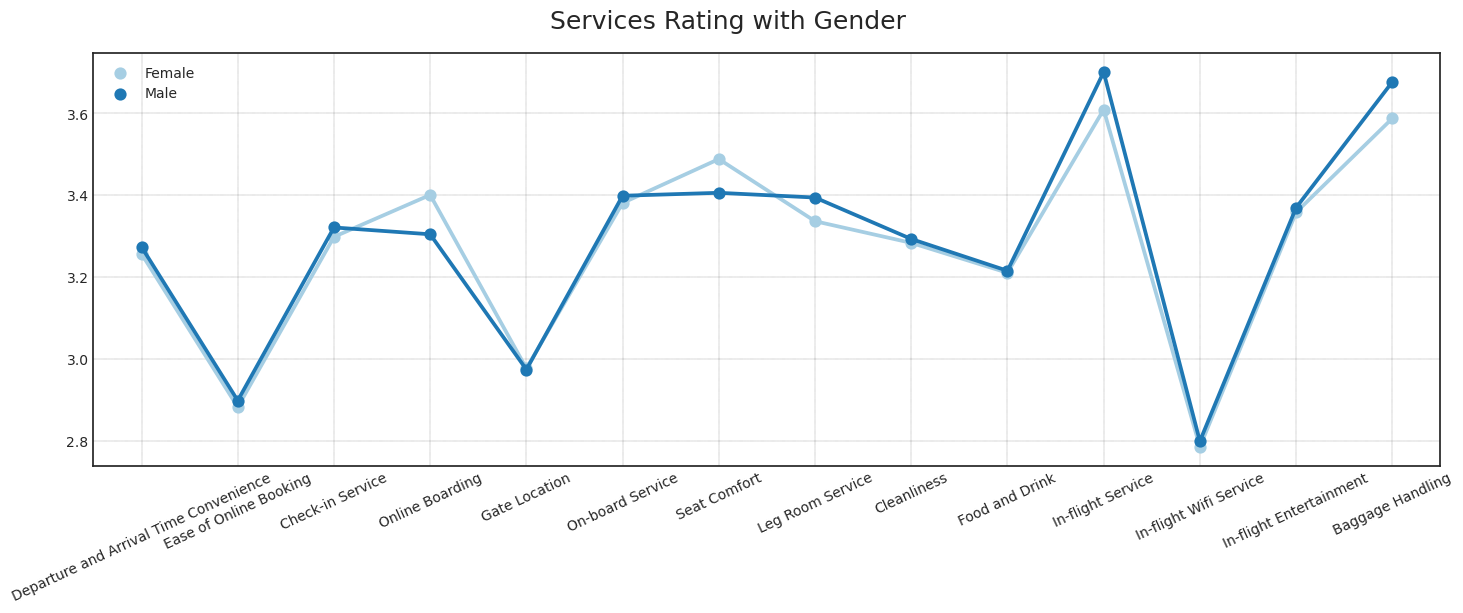

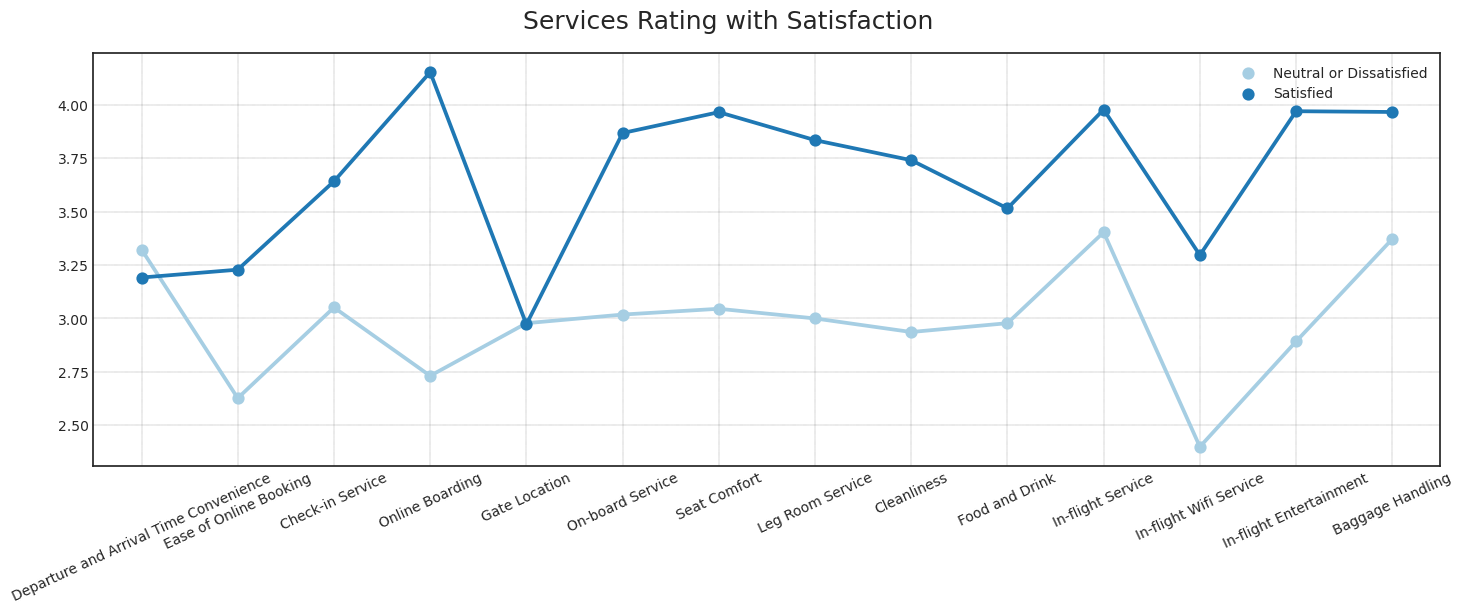

In [39]:
for f in categorical_data:
    service_show(f)

- Service Rating for <font size=4>Flight Classes</font>:
    - Overview : <font color='#2088a8' size=4 >Busniness Class</font> give <font color='#2088a8' size=4 >higher ratings </font>for services.
    - <font color='#a83232' size=4 >Gate location</font>  got poor rating by <font color='#a83232' size=4 >business class</font>.
    - <font color='#a83232' size=4 >Time Delays</font>  got poor rating by <font color='#a83232' size=4 >business class</font> .
    -<font color='#a83232' size=4 >Wifi</font>  got <font color='#a83232' size=4 >worst</font>  rating by <font color='#a83232' size=4 > economy class</font> same as <font color='#a83232' size=4 >online booking</font>.
   
   
   
- Service Rating for <font size =4>Type of Customer</font>:
    - Overview: <font color='#2088a8' size=4 >Returning Customers</font> give <font color='#2088a8' size=4 >higher ratings</font> 
    -<font color='#309663' size=4 > Online boarding, Seat Comfort, In flight entertainment </font>got
 <font color='#2088a8' size=4 >High rating</font> for <font color='#2088a8' size=4 >Returning customers</font>
, while got <font color='#a83232' size=4 >poor Rating</font>  for <font color='#a83232' size=4 > first time customers</font>.


- Service Rating for <font size=4>Satisfaction</font>:
    - Overview: <font color='#2088a8' size=4 >Satisfied</font> Passenger give <font color='#2088a8' size=4 >High Ratings </font>for services.
    - <font color='#309663' size=4 >Gate Location</font> service got <font color='#309663' size=4 >Moderate and Equal Rate</font> for both (Satisfied and dissatisfied) Passengers.


- Service Rating for <font size =4> Gender</font>:
    - Overview: almost all services got <font color='#309663' size=4 >close rates</font>
 for both gender.


- Service Rating for <font size=4>Type of Travel</font>:
    - Overview : <font color='#2088a8' size=4 >Busniness</font> give <font color='#2088a8' size=4 >higher ratings </font>for services.
    - <font color='#2088a8' size=4 >Delay Times</font>  got <font color='#2088a8' size=4 >Excellent rate</font>
 by <font color='#2088a8' size=4 >Personal Type</font>, Unlike for <font color='#a83232' size=4 >Business type</font>.
    - <font color='#309663' size=4 >Check in Service</font> got <font color='#309663' size=4 >Moderate and Equal Rate</font> for both (Personal and Business) type of Passengers.


---

Let's look whether <font size =4>Time Delays</font> differ by classes or not:

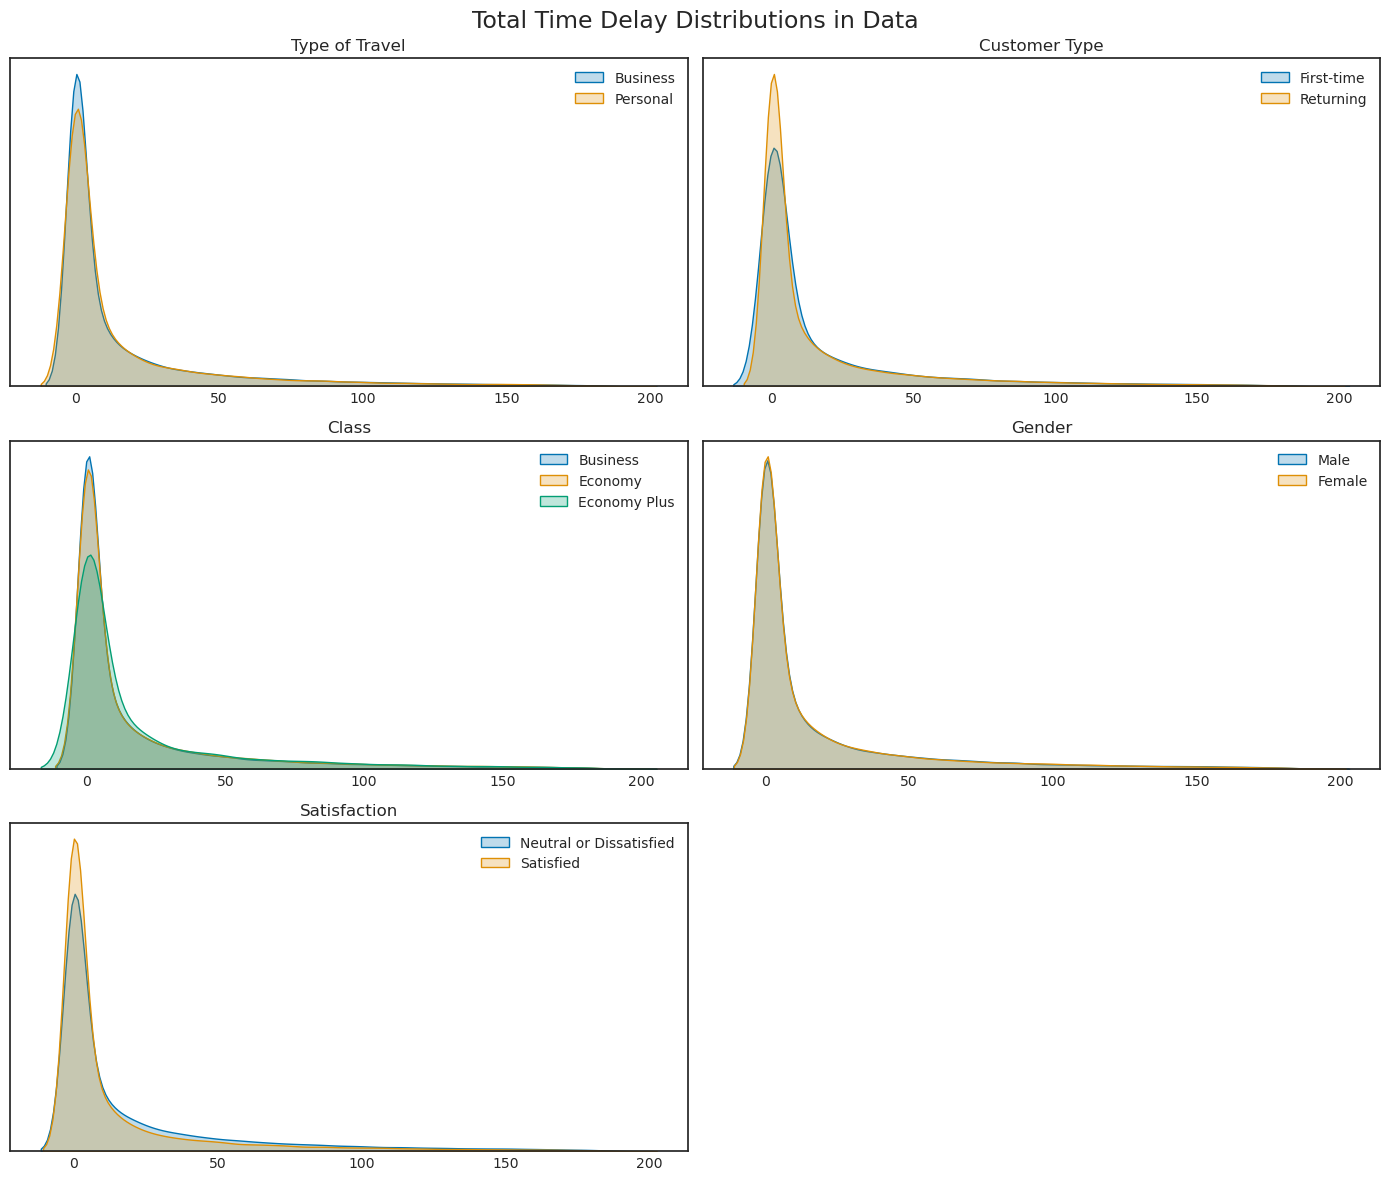

In [40]:
plt.style.use('seaborn-white')
sns.set_palette('colorblind')

automated_dist('Total Time Delay')

- Overview: <font color='#309663' size=4 >Total time delay</font> has no Relation with any of (type of Travel, Satisfaction, Gender, Class and Customer type)
and <font color='#309663' size=4 >distributed equally</font>.

---

let's take a quick look at <font size=4>Services Ratings</font> and their relations with each other.

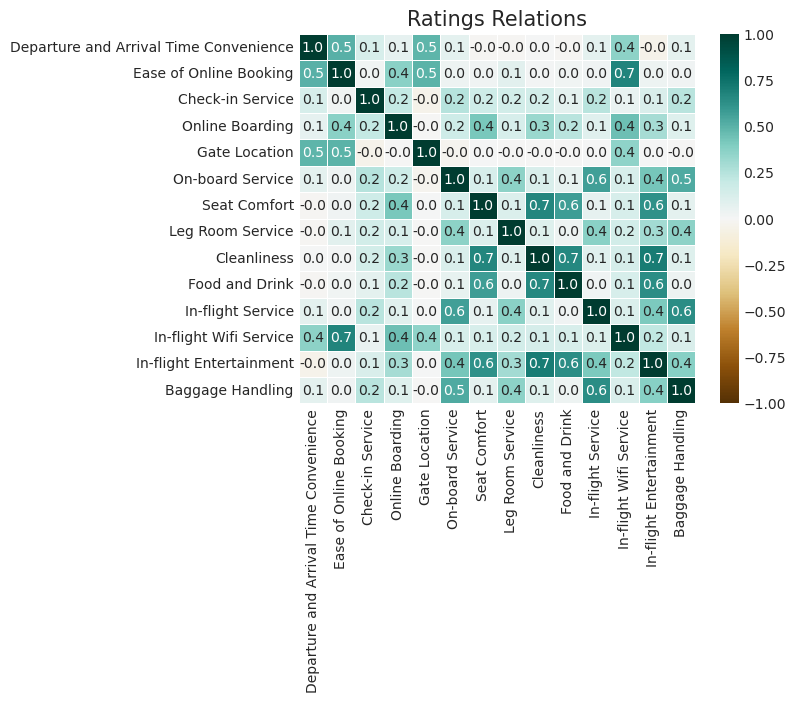

In [41]:
sns.heatmap(numerical_Ratings.corr(),cmap='BrBG',center=0,vmin=-1,vmax=1,annot=True,fmt='.1f',linewidth=.5)
plt.title("Ratings Relations",size=15)
plt.show()

- Overview: There's a lot of <font color='#309663' size=4 >Strong Positive Relationships</font> between Services Ratings, showen as:
    - $\color{green}{>0.5} \text{ is strong positive relation}$

---

<br>
<br>
<br>

<a name='5'></a>
# 4- Conclusion

<font size=4>Age</font> Distributions for Passangers differ based on their type of travel, Satifacation, customer type and class:
- <font color='#2088a8' size=3 >Older Passengers</font> tend to be:
    - <font color='#2088a8' size=4 >Satisfied, Returning Customers, Business Class</font>.


- <font color='#a83232' size=3 >Younger Passengers</font> tend to be:
    - <font color='#a83232' size=4 >Dissatisfied, First time Customers, Economy Class</font>.
- <font color='#309663' size=4>Equally</font> Age Distributed for Passengers <font color='#309663' size=4>Gender</font>.

<font size=4>Flight distance</font> Distributions for passangers differ based on their type of travel, Satifacation, customer type and class:
-  <font color='#2088a8' size=4 >Business</font> type of travel ,<font color='#2088a8' size=4 >Satisfied</font> Passengers
,<font color='#2088a8' size=4 >Business</font> Class, <font color='#2088a8' size=4 >Returning</font> Customers. All of those Traveled long Distance than others.


- <font color='#a83232' size=4 >Gender</font> and <font color='#a83232' size=4 >Total Time Delay</font> Categories has same distribution for Kilometeres Traveled

<font size=4>Categories</font>:
- <font color='#309663' size=4 >Returning</font> Customer type is almost<font color='#309663' size=4 > Equally</font> (satisfied & dissatisfied) but <font color='#a83232' size=4 > First time</font> Customers <font color='#a83232' size=4 >not satified at all</font>.


- <font color='#2088a8' size=4 >Business</font> Class is <font color='#2088a8' size=4 >More Satisfied</font> unlike <font color='#a83232' size=4 >Economy & Eco Plus</font> Class which mostly <font color='#a83232' size=4 >not satisfied</font>.


- <font color='#2088a8' size=4 >Business</font> Type of Travel is <font color='#2088a8' size=4 >More Satisfied</font> unlike <font color='#a83232' size=4 >Personal</font> type which mostly <font color='#a83232' size=4 >not satisfied</font>.


- <font color='#309663' size=4 >Gender</font> is almost <font color='#309663' size=4 >Equally</font> for Satisfied (or not) Men and Women.


<font size=4>Services</font>
- <font color='#2088a8' size=4 > In-Flight Service, Baggage Handling and Seat Comfort </font> are best 3 Services by Passengers Rating.


- <font color='#a83232' size=4 >Wifi , Ease of Online Booking, Gate Location</font> services got pooring rates by Passengers.

- Service Rating for <font size=4>Flight Classes</font>:
    - Overview : <font color='#2088a8' size=4 >Busniness Class</font> give <font color='#2088a8' size=4 >higher ratings </font>for services.
    - <font color='#a83232' size=4 >Gate location</font>  got poor rating by <font color='#a83232' size=4 >business class</font>.
    - <font color='#a83232' size=4 >Time Delays</font>  got poor rating by <font color='#a83232' size=4 >business class</font> .
    -<font color='#a83232' size=4 >Wifi</font>  got <font color='#a83232' size=4 >worst</font>  rating by <font color='#a83232' size=4 > economy class</font> same as <font color='#a83232' size=4 >online booking</font>.
   
   
   
- Service Rating for <font size =4>Type of Customer</font>:
    - Overview: <font color='#2088a8' size=4 >Returning Customers</font> give <font color='#2088a8' size=4 >higher ratings</font> 
    -<font color='#309663' size=4 > Online boarding, Seat Comfort, In flight entertainment </font>got
 <font color='#2088a8' size=4 >High rating</font> for <font color='#2088a8' size=4 >Returning customers</font>
, while got <font color='#a83232' size=4 >poor Rating</font>  for <font color='#a83232' size=4 > first time customers</font>.


- Service Rating for <font size=4>Satisfaction</font>:
    - Overview: <font color='#2088a8' size=4 >Satisfied</font> Passenger give <font color='#2088a8' size=4 >High Ratings </font>for services.
    - <font color='#309663' size=4 >Gate Location</font> service got <font color='#309663' size=4 >Moderate and Equal Rate</font> for both (Satisfied and dissatisfied) Passengers.


- Service Rating for <font size =4> Gender</font>:
    - Overview: almost all services got <font color='#309663' size=4 >close rates</font>
 for both gender.


- Service Rating for <font size=4>Type of Travel</font>:
    - Overview : <font color='#2088a8' size=4 >Busniness</font> give <font color='#2088a8' size=4 >higher ratings </font>for services.
    - <font color='#2088a8' size=4 >Delay Times</font>  got <font color='#2088a8' size=4 >Excellent rate</font>
 by <font color='#2088a8' size=4 >Personal Type</font>, Unlike for <font color='#a83232' size=4 >Business type</font>.
    - <font color='#309663' size=4 >Check in Service</font> got <font color='#309663' size=4 >Moderate and Equal Rate</font> for both (Personal and Business) type of Passengers.


<font size=4>Delays</font>
- <font color='#2088a8' size=4 >Strong</font> Relationship between Departure and Arrival Delay Times


- <font color='#309663' size=4 >Total time delay</font> has no Relation with any of (type of Travel, Satisfaction, Gender, Class and Customer type)
and <font color='#309663' size=4 >distributed equally</font>.

---

<a name='7'></a>
# Machine Learning

<a name ='packages'></a>
# 5- ML Packages

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

<a name='pre'></a>

<br>

# 6- Data Preparation for ML

In [43]:
data.shape

(124260, 27)

In [44]:
data.sample()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Total Time Delay,Arrival Delay_Category,Departure Delay_Category,Total Time Delay_Category
40763,Male,20,Returning,Business,Business,501,0,0,2,2,...,4,3,2,4,4,Satisfied,0,<1,<1,<1


In [45]:
data2 = data.drop(columns=['Departure Delay_Category','Arrival Delay_Category','Total Time Delay','Gender','Total Time Delay_Category'])

In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124260 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Age                                     124260 non-null  int64   
 1   Customer Type                           124260 non-null  object  
 2   Type of Travel                          124260 non-null  object  
 3   Class                                   124260 non-null  object  
 4   Flight Distance                         124260 non-null  int64   
 5   Departure Delay                         124260 non-null  int64   
 6   Arrival Delay                           124260 non-null  int64   
 7   Departure and Arrival Time Convenience  124260 non-null  category
 8   Ease of Online Booking                  124260 non-null  category
 9   Check-in Service                        124260 non-null  category
 10  Online Boarding                 

In [47]:
cat = list(data2.select_dtypes(include=['object','category']).columns)
cat.remove('Customer Type')
cat.remove('Type of Travel')
cat.remove('Class')
cat

['Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction']

In [48]:
def encode_categorical_columns(data, catt):
    for column in catt:
        data[column + '_E'] = pd.Categorical(data[column]).codes
    data.drop(columns=catt, inplace=True)
        
    return data
enc_data = encode_categorical_columns(data2,cat)

In [49]:
enc_data.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience_E,Ease of Online Booking_E,Check-in Service_E,Online Boarding_E,Gate Location_E,On-board Service_E,Seat Comfort_E,Leg Room Service_E,Cleanliness_E,Food and Drink_E,In-flight Service_E,In-flight Wifi Service_E,In-flight Entertainment_E,Baggage Handling_E,Satisfaction_E
count,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000,124260.000000
mean,39.453042,1188.919355,8.767133,9.038934,2.265138,1.890126,2.309689,2.353444,1.975414,2.389900,2.447883,2.365113,2.288331,2.212957,2.654595,1.791928,2.363850,2.631804,0.437711
std,15.116980,995.584147,17.227280,17.335180,1.361477,1.271898,1.263524,1.252885,1.279056,1.285336,1.318117,1.300323,1.312525,1.327320,1.172470,1.248250,1.334446,1.182671,0.496107
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,413.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,0.000000
75%,51.000000,1744.000000,9.000000,10.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,1.000000
max,85.000000,4243.000000,95.000000,97.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [50]:
enc_data.reset_index(drop=True,inplace=True)

In [51]:
categorical_columns = list(enc_data.select_dtypes(include=['object', 'category']).columns)

encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(enc_data[categorical_columns])
one_hot_encoded_array = one_hot_encoded.toarray()

e = enc_data.drop(columns=categorical_columns)

data_prepared = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out(categorical_columns))
alldata = pd.concat([data_prepared, e], axis=1)

In [52]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124260 entries, 0 to 124259
Data columns (total 26 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Customer Type_First-time                  124260 non-null  float64
 1   Customer Type_Returning                   124260 non-null  float64
 2   Type of Travel_Business                   124260 non-null  float64
 3   Type of Travel_Personal                   124260 non-null  float64
 4   Class_Business                            124260 non-null  float64
 5   Class_Economy                             124260 non-null  float64
 6   Class_Economy Plus                        124260 non-null  float64
 7   Age                                       124260 non-null  int64  
 8   Flight Distance                           124260 non-null  int64  
 9   Departure Delay                           124260 non-null  int64  
 10  Arrival Delay       

In [53]:
x,y = alldata.drop(columns=['Satisfaction_E']),alldata.Satisfaction_E

In [54]:
X_train, xtemp, y_train, ytemp = train_test_split(x, y, test_size=0.2, random_state=124)
X_val, X_test, y_val, y_test = train_test_split(xtemp, ytemp, test_size=0.5, random_state=42)

In [55]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<a name='alg'></a>
# 7- Apply Machine Learning Algorithms

## `Linear models`

In [56]:
def modeling(classifiers, cv=5):
    f1_scores = {'Model': [], 'Data': [], 'F1-score': []}
    
    for model in classifiers:
        train_f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
        test_f1_scores = cross_val_score(model, X_val, y_val, cv=cv, scoring='f1')
        
        f1_scores['Model'].extend([type(model).__name__] * len(train_f1_scores) * 2)
        f1_scores['Data'].extend(['Train'] * len(train_f1_scores) + ['Validate'] * len(test_f1_scores))
        f1_scores['F1-score'].extend(np.concatenate([train_f1_scores, test_f1_scores]))
    
    df = pd.DataFrame(f1_scores)
    return df

In [57]:
def compare_models(df,title,xlabel='Model'):
    plt.figure(figsize=(10, 6))
    sns.pointplot(data=df, x='Model', y='F1-score', hue='Data', dodge=True, ci=None,palette='Blues_r')
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel('Mean F1-score', fontsize=14)
    plt.legend(title='Data', title_fontsize=12, fontsize=10)
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.15, color='black')
    plt.legend()
    plt.show()

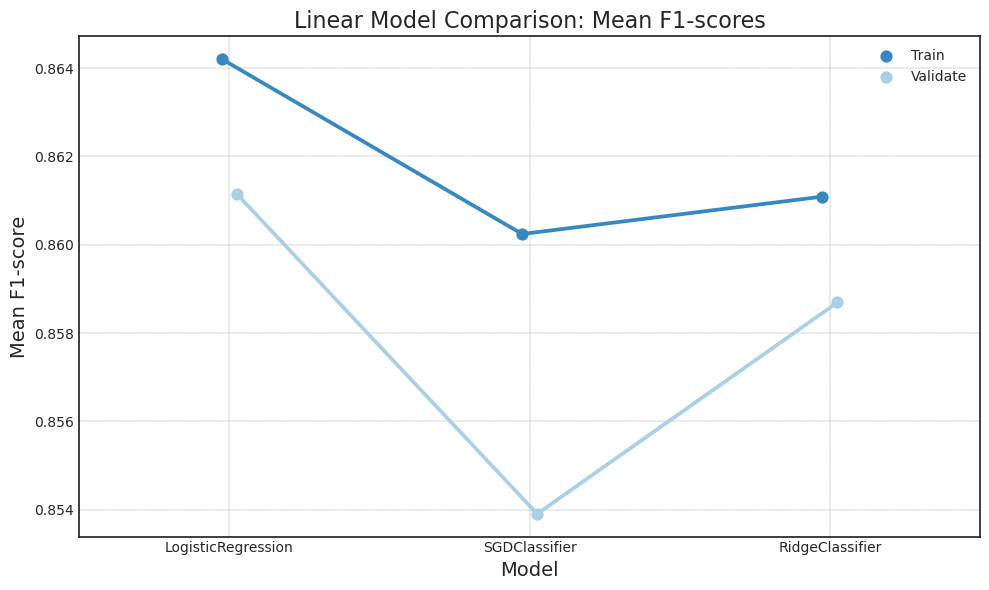

In [58]:
classifiers = [LogisticRegression(), SGDClassifier(), RidgeClassifier()]
linearr = modeling(classifiers)
compare_models(linearr,"Linear Model Comparison: Mean F1-scores")

## `Trees`

In [59]:
trees = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier()
]

tree_models = modeling(trees)

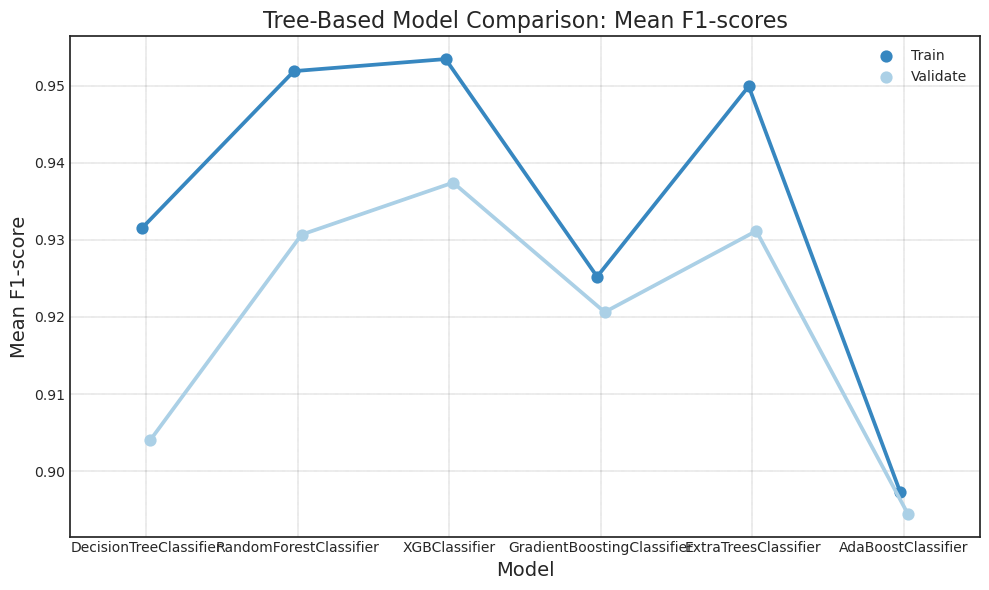

In [60]:
compare_models(tree_models,"Tree-Based Model Comparison: Mean F1-scores")

<a name='best'></a>

# 8- Best Model 💡

We noticed that the <font color='steelblue' size= 4>XGBClassifier</font> has the best score so far. Therefore, we can tune it by adjusting hyperparameters to achieve the best results.

In [61]:
max_depth_values = [3,5, 7, 9, 10,11,13,14,15,17,19]
plot_data = []

for max_depth in max_depth_values:
    xgb_classifier = XGBClassifier(n_estimators=100, max_depth=max_depth, learning_rate=0.1)
    
    train_f1_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='f1')
    test_f1_scores = cross_val_score(xgb_classifier, X_val, y_val, cv=5, scoring='f1')
    
    # Append data for plotting within the loop
    for score in train_f1_scores:
        plot_data.append({'Model': f'{max_depth}', 'Data': 'Train', 'F1-score': score})
    for score in test_f1_scores:
        plot_data.append({'Model': f'{max_depth}', 'Data': 'Validate', 'F1-score': score})
    print(str(max_depth)+' Finished')
    print('-'*40)
# Create a DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

3 Finished
----------------------------------------
5 Finished
----------------------------------------
7 Finished
----------------------------------------
9 Finished
----------------------------------------
10 Finished
----------------------------------------
11 Finished
----------------------------------------
13 Finished
----------------------------------------
14 Finished
----------------------------------------
15 Finished
----------------------------------------
17 Finished
----------------------------------------
19 Finished
----------------------------------------


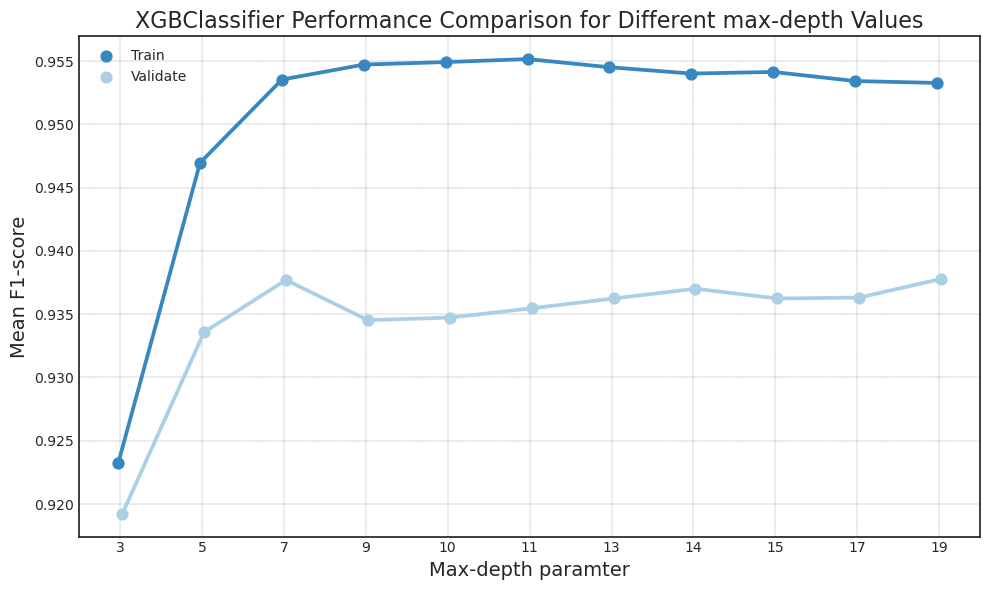

In [62]:
compare_models(plot_df,'XGBClassifier Performance Comparison for Different max-depth Values','Max-depth paramter')

In [63]:
est = [10,50,100,150,200]
plot_data = []

for n_est in est:
    xgb_classifier = XGBClassifier(n_estimators=n_est, max_depth=11, learning_rate=0.1)
    
    train_f1_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='f1')
    test_f1_scores = cross_val_score(xgb_classifier, X_val, y_val, cv=5, scoring='f1')
    
    # Append data for plotting within the loop
    for score in train_f1_scores:
        plot_data.append({'Model': f'{n_est}', 'Data': 'Train', 'F1-score': score})
    for score in test_f1_scores:
        plot_data.append({'Model': f'{n_est}', 'Data': 'Validate', 'F1-score': score})
    print(str(n_est)+' Finished')
    print('-'*40)
# Create a DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

10 Finished
----------------------------------------
50 Finished
----------------------------------------
100 Finished
----------------------------------------
150 Finished
----------------------------------------
200 Finished
----------------------------------------


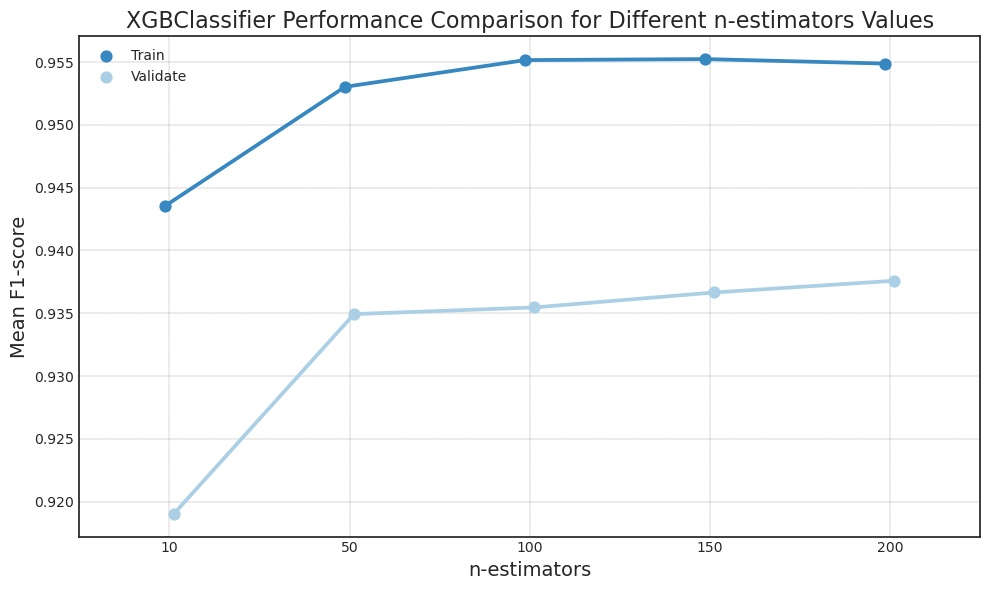

In [64]:
compare_models(plot_df,'XGBClassifier Performance Comparison for Different n-estimators Values','n-estimators')

In [65]:
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]
plot_data = []

for rate in learning_rates:
    xgb_classifier = XGBClassifier(n_estimators=100, max_depth=11, learning_rate=rate)
    
    train_f1_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='f1')
    test_f1_scores = cross_val_score(xgb_classifier, X_val, y_val, cv=5, scoring='f1')
    
    # Append data for plotting within the loop
    for score in train_f1_scores:
        plot_data.append({'Model': f'{rate}', 'Data': 'Train', 'F1-score': score})
    for score in test_f1_scores:
        plot_data.append({'Model': f'{rate}', 'Data': 'Validate', 'F1-score': score})
    print(str(rate)+' Finished')
# Create a DataFrame for plotting
plot_df = pd.DataFrame(plot_data)

0.01 Finished
0.1 Finished
0.2 Finished
0.3 Finished
0.4 Finished


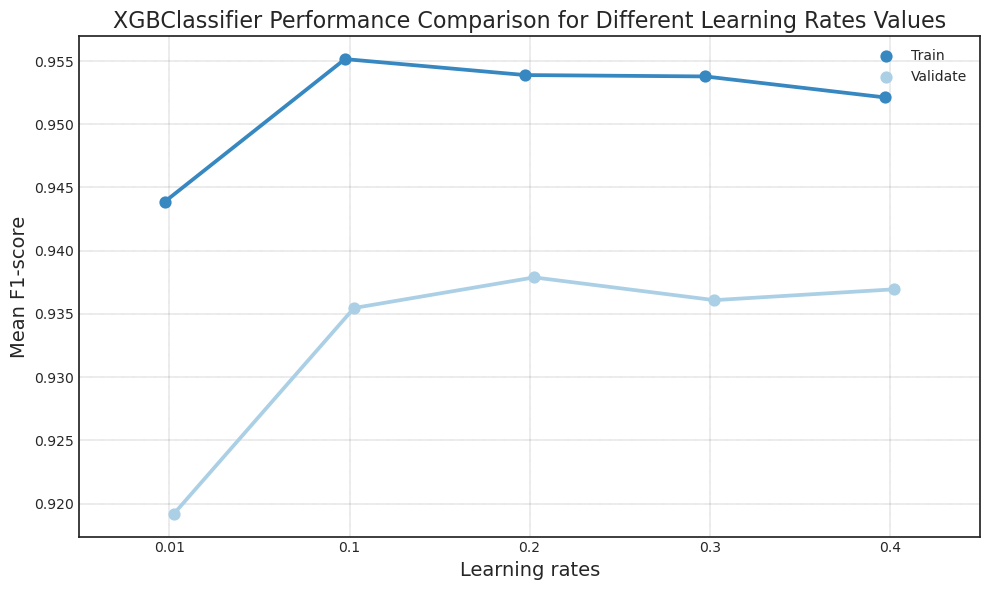

In [66]:
compare_models(plot_df,'XGBClassifier Performance Comparison for Different Learning Rates Values','Learning rates')

## Testing and Reporting

In [67]:
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=11, learning_rate=0.1)
xgb_classifier.fit(X_train,y_train);

In [68]:
train_acc = f1_score(y_train,xgb_classifier.predict(X_train))*100
validate_acc = f1_score(y_val,xgb_classifier.predict(X_val))*100
test_acc = f1_score(y_test,xgb_classifier.predict(X_test))*100

scores = [train_acc,validate_acc,test_acc]
da = ['Train','Validate','Test']

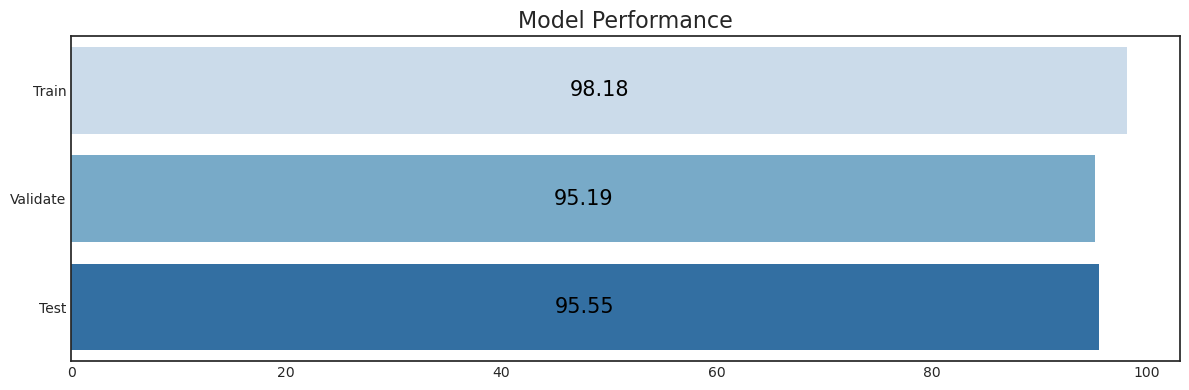

In [69]:

plt.figure(figsize=(12,4))
g= sns.barplot(y=da,x= scores,palette='Blues')
for j in g.containers:
    g.bar_label(j,label_type='center',fmt='%.4g',color='black',size=15)
    
plt.title("Model Performance",size=16)
plt.tight_layout()
plt.show()

---